In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from sklearn.utils import class_weight, shuffle
import cv2

In [7]:
IMG_SIZE = 224
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 1000

In [16]:
path = "data/train.csv"
df_train = pd.read_csv(path)
x = df_train['id_code']
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=SEED)

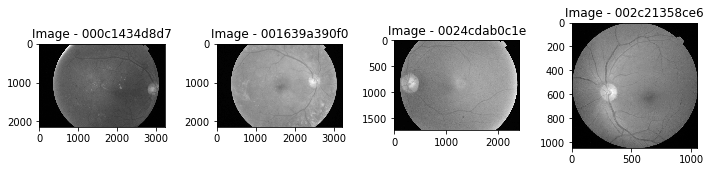

In [22]:
# Printing image grid with color images
columns = 4
rows = 1
fig = plt.figure(figsize=(10, 10))
# for i in x:
for i in range(columns*rows):
    image = cv2.imread(f"../../Desktop/FinalProject/Final_Project_data/train_images/{x[i]}.png")
    #image = cv2.imread(f'test_images/{x[i]}.png')
#     print(x[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.resize(image, (1000, 1000))
    plt.imshow(image, cmap='gray')
 
plt.tight_layout()

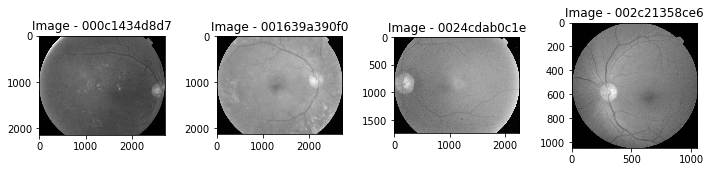

In [25]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

IMAGESIZE = 224
columns = 4
rows = 1
fig = plt.figure(figsize=(10, 10))
# for i in x:
for i in range(columns*rows):
    image = cv2.imread(f"../../Desktop/FinalProject/Final_Project_data/train_images/{x[i]}.png")
#     print(x[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = crop_image1(image)
    #image = cv2.resize(image, (IMAGESIZE, IMAGESIZE))
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()

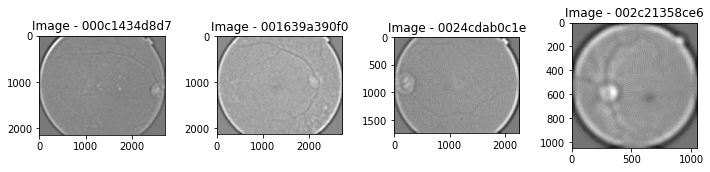

In [27]:
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]



IMAGESIZE = 224
columns = 4
rows = 1
fig = plt.figure(figsize=(10, 10))

for i in range(columns*rows):
    image = cv2.imread(f"../../Desktop/FinalProject/Final_Project_data/train_images/{x[i]}.png")
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = crop_image1(image)
    #image = cv2.resize(image, (IMAGESIZE, IMAGESIZE))
    image = cv2.GaussianBlur( image , (0,0) , IMAGESIZE/10)
    image = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMAGESIZE/10) ,-4 ,128)
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()